# Laboratorium 09
## Równania różniczkowe zwyczajne
Iga Antonik, Helena Szczepanowska

# Zadanie 1. 
Przedstaw każde z poniższych równań różniczkowych zwyczajnych jako równoważny układ równań pierwszego rzędu (ang. first-order system of ODEs):
- a) równanie Van der Pol’a:  $ y′′= y′(1 −y^2) −y $

- b) równanie Blasiusa:  $ y′′′= −yy′′$
- c) II zasada dynamiki Newtona dla problemu dwóch ciał:
    $$ y_1′′ = −GMy_1/(y_1^2 + y_2^2)^{3/2} $$ 
    $$ y_2′′ = −GMy_2/(y_1^2 + y_2^2)^{3/2} $$

## Rozwiązanie

a) równanie Van der Pol'a:

Podstawienia:
$$ y_1=y$$
$$ y_2 = y′$$
Układ równań:
$$y_1′ = y_2$$
$$y_2′ =y_2(1−y_1^2)-y_1$$

b) równanie Blasius'a: 

Podstawienia:
$$ y_1=y $$
$$ y_2 = y′ $$
$$ y_3 = y′′$$
Układ równań:
$$ y_1′ = y_2 $$
$$ y_2′ = y_3 $$
$$ y_3′ = −y_1y_3 $$

c) II zasada dynamiki Newton'a dla problemu dwóch ciała: 

Podstawienie:
$$ y_3 = y_1$$ 
$$ y_4 = y_2$$
$$ y_5 = y_1′ $$
$$ y_6 = y_2′ $$
Układ równań:
$$ y_3′ = y_5 $$
$$ y_4′ = y_6 $$
$$ y_5′ = \frac{−GM · y_3}{(y_3^2 + y_4^2)^{3/2}} $$ 
$$ y_6′ = \frac{−GM · y_4}{(y_3^2 + y_4^2)^{3/2}} $$

# Zadanie 2. 
Dane jest równanie różniczkowe zwyczajne
$ y′= −5y $ 
z warunkiem początkowym $ y(0) = 1$ . Równanie rozwiązujemy numerycznie z
krokiem $ h = 0.5 $.
- a) Analityczna stabilność. Wyjaśnij, czy rozwiązania powyższego równania są
stabilne?
- b) Numeryczna stabilność. Wyjaśnij, czy metoda Euler’a jest stabilna dla tego
równania z użytym krokiem h?
- c) Oblicz numerycznie wartości przybliżonego rozwiązania dla $ t = 0.5 $ metodą
Euler’a.
- d) Wyjaśnij, czy niejawna metoda Euler’a jest stabilna dla tego równania z
użytym krokiem h?
- e) Oblicz numerycznie wartości przybliżonego rozwiązania dla $ t = 0.5 $ niejawną
metodą Euler’a.


## Rozwiązanie
### a)


Rozwiązania równania $ y′= −5y $ są analitycznie stabilne.
Dla warunku początkowego $ y(0) = 1 $ rozwiązanie to $ y = e^{-5t} $
$$ \lim_{t->\infty}{e^{-5t}} = 0 $$

Poniewaz rozwiazanie zbiega do zera, gdy czas t rosnie, mozemy stwierdzic, ze rozwiazania tego rownania sa stabilne w sensie analitycznym.

### Biblioteki

In [506]:
import numpy as np
import matplotlib.pyplot as plt

### Obliczanie numerycznej stabilności
Warunek dla jawnej metody Eulera
![image2.png](img/image2.png)


Warunek dla niejawnej metody Eulera
![image.png](img/image.png)


In [507]:
lambd = -5
h = 0.5

explicit_euler_amp_factor = lambda lambd,h: 1 + lambd*h
implicit_euler_amp_factor = lambda lambd,h: 1/(1-lambd*h)

print("Amplification factors:")
print("explicit euler method: ",round(explicit_euler_amp_factor(lambd,h),2),
       "\nimplicit euler method: ",round(implicit_euler_amp_factor(lambd,h),2))


Amplification factors:
explicit euler method:  -1.5 
implicit euler method:  0.29


### b)
Jawna metoda Eulera nie jest numerycznie stabilna, poniewaz wartość bezwzględna z czynnika wzmocnienia nie jest mniejsa od 1.
$$ |-1.5| > 1 $$

### d)
Niejawna metoda Eulera jest numerycznie stablina, poniewaz wartość bezwzględna z czynnika wzmocnienia jest mniejsa od 1.
$$ |0.29| < 1 $$

### Obliczanie jawną metodą Eulera

In [508]:
n=5

t_values = np.arange(0, n + h, h)
y_values = np.zeros(len(t_values))
y_values[0] = 1
for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1]*(1+h*lambd)


print(f"t={t_values[1]} y={y_values[1]}")

t=0.5 y=-1.5


### c)

Wartość przyblizonego rozwiazania dla $ t = 0.5 $ wynosi $ y = -1.5 $

### Wykres rozwiązanie uzyskanego tą metodą

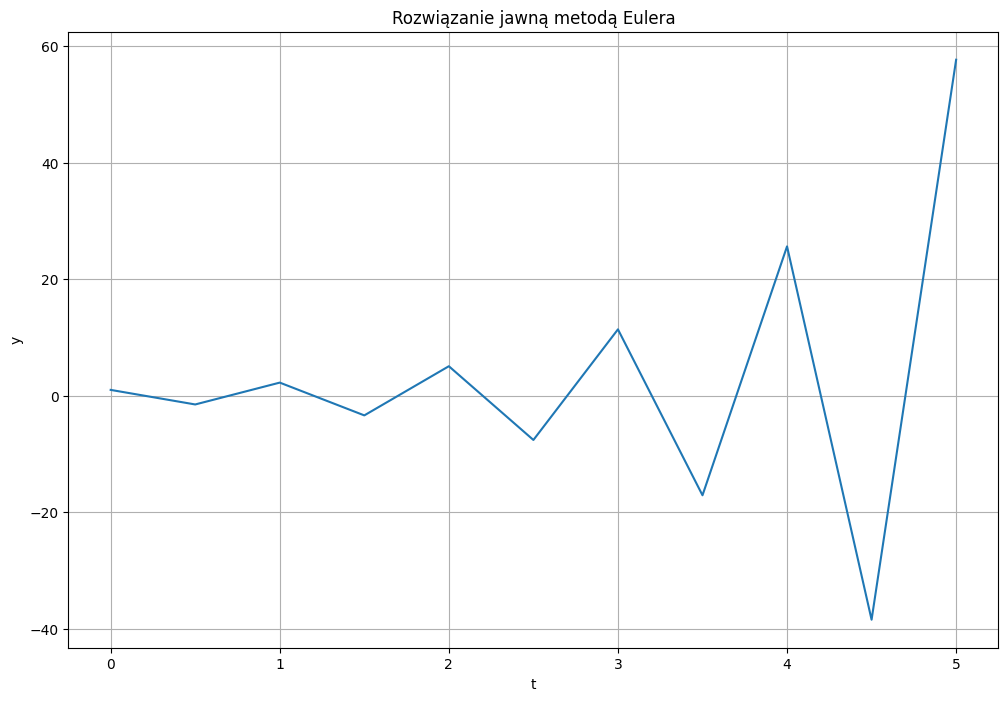

In [509]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązanie jawną metodą Eulera")
plt.plot(t_values, y_values)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

Na powyszym wykresie dobrze widać, ze jawna metoda eulera jest niestabilna.

### Obliczanie niejawną metodą Eulera

In [510]:
t_values_imp = np.arange(0, n + h, h)
y_values_imp  = np.zeros(len(t_values_imp))
y_values_imp[0] = 1
for i in range(1, len(t_values_imp)):
        y_values_imp[i] = y_values_imp[i-1]/(1-lambd*h)

print(f" t={t_values_imp[1]} y={round(y_values_imp[1],2)}")

 t=0.5 y=0.29


### c)

Wartość przyblizonego rozwiazania dla $ t = 0.5 $ wynosi $ y = 0.29 $

### Wykres rozwiązanie uzyskanego tą metodą

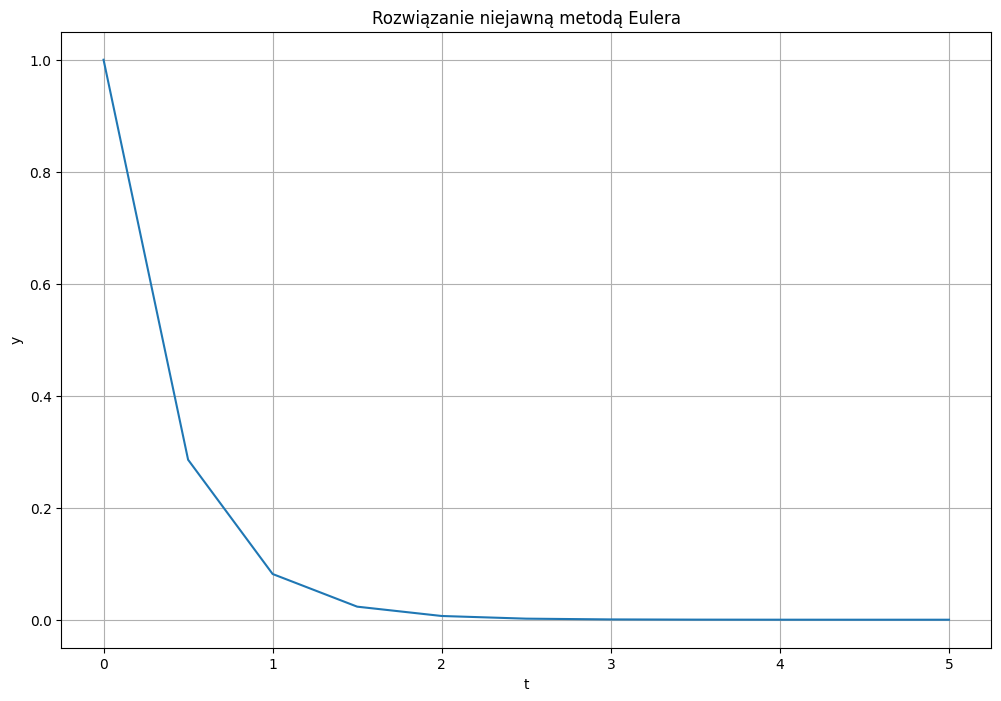

In [511]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązanie niejawną metodą Eulera")
plt.plot(t_values_imp, y_values_imp)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

### Wykres obu rozwiązań razem

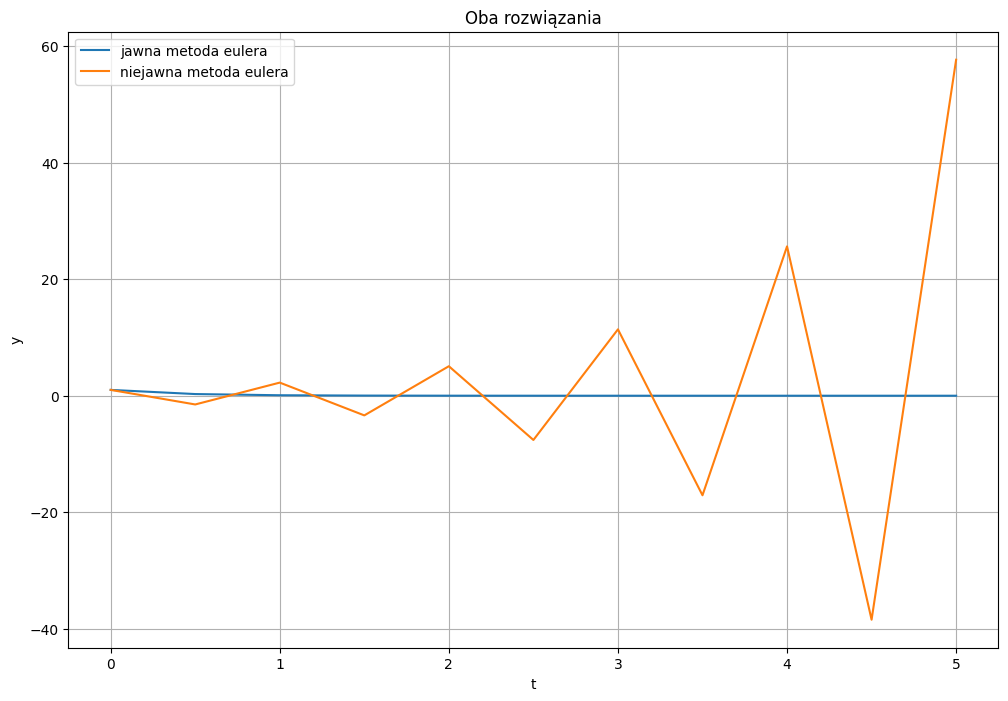

In [512]:
plt.figure(figsize=(12, 8))
plt.title("Oba rozwiązania")
plt.plot(t_values_imp, y_values_imp, label='jawna metoda eulera')
plt.plot(t_values, y_values, label='niejawna metoda eulera')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Zadanie 3. 
Model Kermack’a-McKendrick’a przebiegu epidemii w populacji opisany jest układem równań różniczkowych:
$$ S^′= −\frac{β}{N}IS $$
$$ I^′= \frac{β}{N}IS −γI $$
$$ R^′= γI $$
gdzie
$S$ reprezentuje liczbę osób zdrowych, podatnych na zainfekowanie,

$I$ reprezentuje liczbę osób zainfekowanych i roznoszących infekcję,

$R$ reprezentuje liczbę osób ozdrowiałych,

$N$ reprezentuje liczbę osób w populacji.

Parametr $β$ reprezentuje współczynnik zakaźności (ang. transmission rate). Parametr $γ$ reprezentuje współczynnik wyzdrowień (ang. recovery rate). Wartość $1/γ$ reprezentuje średni czas choroby.

Założenia modelu:
- Przyrost liczby osób zakażonych jest proporcjonalny do liczby osób zakażonych oraz do liczby osób podatnych.
-  Przyrost liczby osób odppornych lub zmarłych jest wprost proporcjonalny
do liczby aktualnie chorych.
- Okres inkubacji choroby jest zaniedbywalnie krótki.
- Populacja jest wymieszana.

Jako wartości początkowe ustal:
$$ S(0) = 762, I(0) = 1, R(0) = 0 $$
Przyjmij też $ N = S(0)+I(0)+R(0) = 763$  oraz $β = 1$.
Zakładając, że średni czas trwania grypy wynosi $1/γ = 7$ dni, przyjmij $γ = 1/7$.

Całkując od $t = 0$ do $t = 14$ z krokiem $0.2$, rozwiąż powyższy układ równań:
- jawną metodą Eulera
$$ y_{k+1} = y_k + h_kf(t_k,y_k) $$
-  niejawną metodą Eulera
$$ y_{k+1} = y_k + h_kf(t_{k+1},y_{k+1})$$ 

- metodą Rungego-Kutty czwartego rzędu (RK4)
$$ y_{k+1} = y_k + \frac{h_k}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$ 
, gdzie:
$$ k_1 = f(t_k,y_k) $$
$$ k_2 = f(t_k + h_k/2,y_k + h_kk_1/2) $$
$$ k_3 = f(t_k + h_k/2,y_k + h_kk_2/2) $$
$$ k_4 = f(t_k + h_k,y_k + h_kk_3) $$
Wykonaj nastepujące wykresy:
- Dla każdej metody przedstaw na wspólnym rysunku wykresy komponentów rozwiązania (S, I, R) jako funkcje t (3 wykresy).
- Na wspólnym rysunku przedstaw wykresy funkcji $S(t)+I(t)+R(t)$ znalezione przez każdą metodę (1 wykres). Czy niezmiennik $S(t)+I(t)+R(t) ≡
N$ jest zachowany?
Wiemy, że liczba osób zakażonych w pewnej szkole kształtowała się następująco:

|Dzień |t| 0| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12| 13| 14|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Zakażeni| I| 1| 3| 6| 25| 73| 222| 294| 258| 237| 191| 125| 69| 27| 11| 4|

Wybierz jedną z powyższych metod numerycznych i oszacuj prawdziwe wartości współczynników $θ = [β,γ]$. W tym celu wykonaj minimalizację funkcji kosztu. Jako funkcję kosztu wykorzystaj sumę kwadratów reszt (ang. residual sum of squares ):
$$ L(θ) = (I_i − ˆI_i)_2 $$
gdzie $I_i$ oznacza prawdziwą liczbę zakażonych, a $ˆI_i$ oznacza liczbę zakażonych wyznaczonych metodą numeryczną. Ponieważ nie znamy gradientu $∇θL(θ)$ , do minimalizacji wykorzystaj metodę Neldera-Meada, która nie wymaga informacji o gradiencie.
Powtórz obliczenia, tym razem jako funkcję kosztu wykorzystując:
$$ L(θ) = -\sum_{i=0}^{T} I_i ln ˆI_i +\sum_{i=0}^{T}ˆI_i $$
Ile wynosił współczynnik reprodukcji $ R_0 = β/γ $ w każdym przypadku?



## Rozwiązanie

### Biblioteki

In [513]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fsolve

### Dane

In [514]:
S = 762
I = 1
R = 0

N = S + I + R
beta = 1
gamma = 1/7

h = 0.2
t_values = np.arange(0, 14.2, h)

S_values_explicit = np.zeros(len(t_values))
I_values_explicit = np.zeros(len(t_values))
R_values_explicit = np.zeros(len(t_values))

S_values_explicit[0]= S
I_values_explicit[0]= I
R_values_explicit[0]= R

S_values_implicit = np.zeros(len(t_values))
I_values_implicit = np.zeros(len(t_values))
R_values_implicit = np.zeros(len(t_values))

S_values_implicit[0]= S
I_values_implicit[0]= I
R_values_implicit[0]= R

S_values_rk4 = np.zeros(len(t_values))
I_values_rk4 = np.zeros(len(t_values))
R_values_rk4 = np.zeros(len(t_values))

S_values_rk4[0]= S
I_values_rk4[0]= I
R_values_rk4[0]= R

# Funkcje pochodnych
def dS_dt(S, I, R):
    return -beta * S * I / N

def dI_dt(S, I, R):
    return beta * S * I / N - gamma * I

def dR_dt(S, I, R):
    return gamma * I


### Jawna metoda Eulera

In [515]:
k = 1
for t in t_values:
    if t==0: continue
    R_old = R
    S_old = S
    I_old = I
    R = R_old + h*gamma*I_old
    S = S_old - h*beta*I_old*S_old/N
    I = I_old + h*beta*I_old*S_old/N - h*gamma*I_old
    S_values_explicit[k] = S
    I_values_explicit[k] = I
    R_values_explicit[k] = R
    k+=1

### Wykres

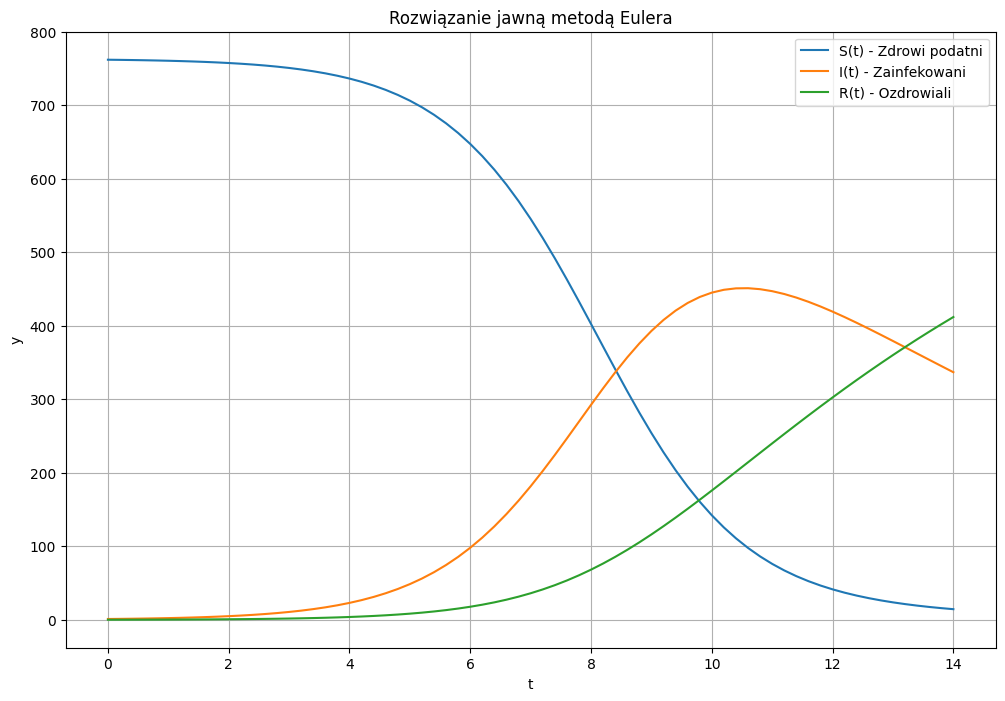

In [516]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązanie jawną metodą Eulera")
plt.plot(t_values, S_values_explicit, label='S(t) - Zdrowi podatni')
plt.plot(t_values, I_values_explicit, label='I(t) - Zainfekowani')
plt.plot(t_values, R_values_explicit, label='R(t) - Ozdrowiali')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Niejawna metoda Eulera

In [517]:
def f(t, y):
    S, I, R = y
    dS = -beta * I * S / N
    dI = beta * I * S / N - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

def implicit_euler_method(y0, h, t_max):
    t_values = np.arange(0, t_max + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for k in range(1, len(t_values)):
        t_next = t_values[k]
        y_prev = y_values[k-1]
        
        def func(y_next):
            return y_next - y_prev - h * f(t_next, y_next)
        
        y_next = fsolve(func, y_prev)
        y_values[k] = y_next
    
    return t_values, y_values

y0 = np.array([S_values_implicit[0], I_values_implicit[0], R_values_implicit[0]])
t_values, y_values = implicit_euler_method(y0, h, 14)


### Wykres

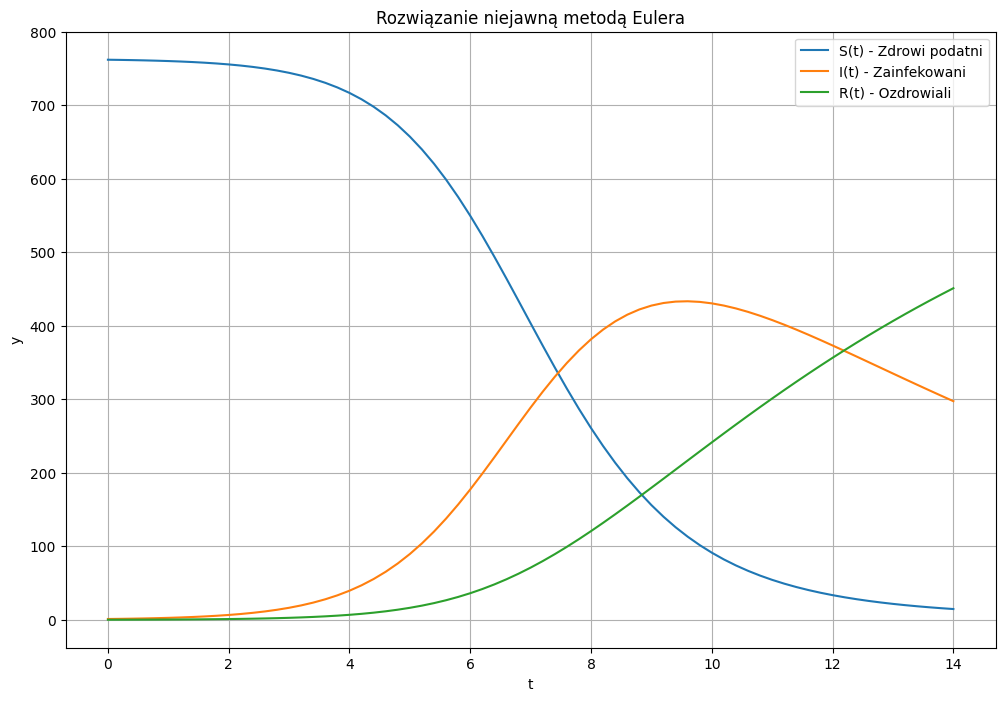

In [518]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązanie niejawną metodą Eulera")
plt.plot(t_values, y_values[:, 0],label='S(t) - Zdrowi podatni')
plt.plot(t_values, y_values[:, 1],label='I(t) - Zainfekowani')
plt.plot(t_values, y_values[:, 2],label='R(t) - Ozdrowiali')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Metoda Rungego-Kutty czwartego rzędu

In [519]:
S, I, R = S_values_rk4[0], I_values_rk4[0], R_values_rk4[0]


k=0
for t in t_values:
    if k+1 == 71: continue
    S_k, I_k, R_k = S_values_rk4[k], I_values_rk4[k], R_values_rk4[k]
    
    k1_S = h * dS_dt(S_k, I_k, R_k)
    k1_I = h * dI_dt(S_k, I_k, R_k)
    k1_R = h * dR_dt(S_k, I_k, R_k)
    
    k2_S = h * dS_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    k2_I = h * dI_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    k2_R = h * dR_dt(S_k + k1_S / 2, I_k + k1_I / 2, R_k + k1_R / 2)
    
    k3_S = h * dS_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    k3_I = h * dI_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    k3_R = h * dR_dt(S_k + k2_S / 2, I_k + k2_I / 2, R_k + k2_R / 2)
    
    k4_S = h * dS_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    k4_I = h * dI_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    k4_R = h * dR_dt(S_k + k3_S, I_k + k3_I, R_k + k3_R)
    
    S_values_rk4[k+1] = S_k + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
    I_values_rk4[k+1] = I_k + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
    R_values_rk4[k+1] = R_k + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6
    k+=1

### Wykres

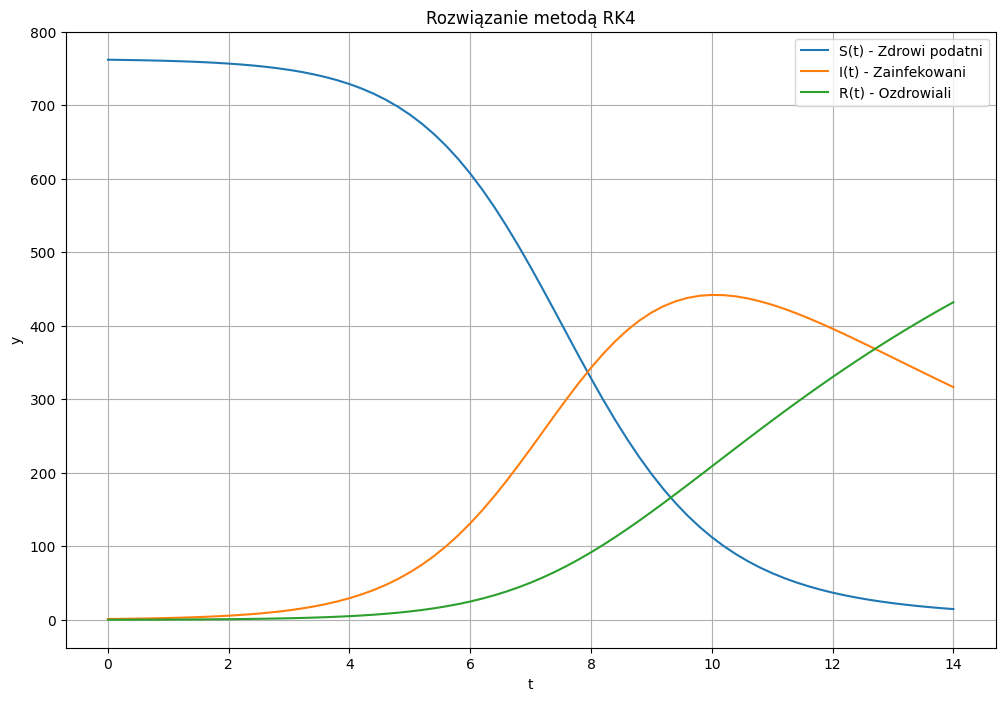

In [520]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązanie metodą RK4")
plt.plot(t_values, S_values_rk4,  label='S(t) - Zdrowi podatni')
plt.plot(t_values, I_values_rk4, label='I(t) - Zainfekowani')
plt.plot(t_values, R_values_rk4, label='R(t) - Ozdrowiali')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Wszystkie rozwiązania na jednym wykresie

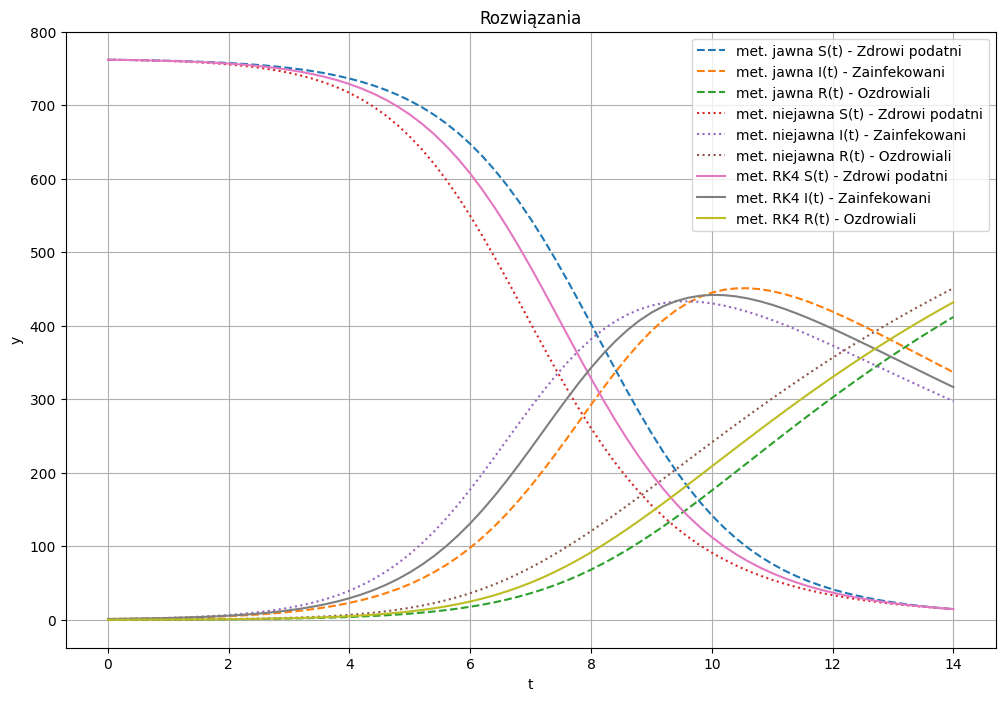

In [521]:
plt.figure(figsize=(12, 8))
plt.title("Rozwiązania")
plt.plot(t_values, S_values_explicit, label='met. jawna S(t) - Zdrowi podatni', linestyle='dashed')
plt.plot(t_values, I_values_explicit, label='met. jawna I(t) - Zainfekowani', linestyle='dashed')
plt.plot(t_values, R_values_explicit, label='met. jawna R(t) - Ozdrowiali', linestyle='dashed')
plt.plot(t_values, y_values[:, 0],label='met. niejawna S(t) - Zdrowi podatni', linestyle='dotted')
plt.plot(t_values, y_values[:, 1],label='met. niejawna I(t) - Zainfekowani', linestyle='dotted')
plt.plot(t_values, y_values[:, 2],label='met. niejawna R(t) - Ozdrowiali', linestyle='dotted')
plt.plot(t_values, S_values_rk4,  label='met. RK4 S(t) - Zdrowi podatni')
plt.plot(t_values, I_values_rk4, label='met. RK4 I(t) - Zainfekowani')
plt.plot(t_values, R_values_rk4, label='met. RK4 R(t) - Ozdrowiali')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Wyniki uzyskane przy pomocy kazdej z metod są do siebie bardzo zblizone. 

### Niezmiennik S(t) + I(t) + R(t) dla różnych metod

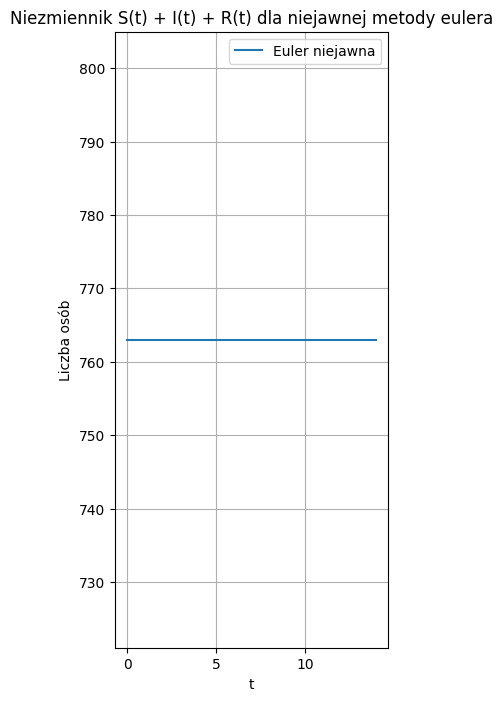

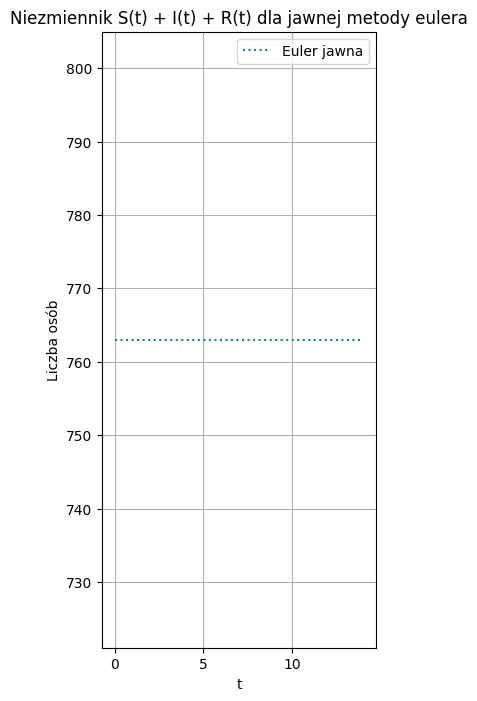

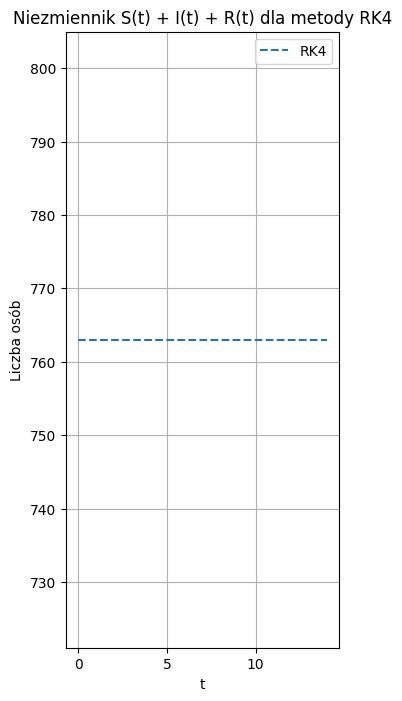

In [522]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.plot(t_values, y_values[:, 0] + y_values[:, 1] + y_values[:, 2], label='Euler niejawna')
plt.xlabel('t')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Niezmiennik S(t) + I(t) + R(t) dla niejawnej metody eulera')
plt.grid()

plt.figure(figsize=(12, 8))
plt.subplot(1,3,2)
plt.plot(t_values, S_values_explicit + I_values_explicit + R_values_explicit,linestyle='dotted',label='Euler jawna')
plt.xlabel('t')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Niezmiennik S(t) + I(t) + R(t) dla jawnej metody eulera')
plt.grid()


plt.figure(figsize=(12, 8))
plt.subplot(1,3,3)
plt.plot(t_values, S_values_rk4 + I_values_rk4 + R_values_rk4, linestyle='dashed',label='RK4')
plt.xlabel('t')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Niezmiennik S(t) + I(t) + R(t) dla metody RK4')
plt.grid()

plt.show()

Jak widać na powyzszym wykresie niezmienniki S(t) + I(t) + R(t) dla kazdej z metod nie zmieniają swojej wartości. Dzięki temu mozemy stwierdzic, ze metody zostaly zaimplementowane poprawnie.

In [523]:


# Dane rzeczywiste
real_I = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(0, 15)

# Estymacja parametrów modelu na podstawie danych rzeczywistych
def simulate_model(beta, gamma):
    S = 762
    I = 1
    R = 0

    I_values = [1]
    for day in range(1, 15):
        S_next = S - h * beta * S * I / N
        I_next = I + h * (beta * S * I / N - gamma * I)
        R_next = R + h * gamma * I
        
        S, I, R = S_next, I_next, R_next
        I_values.append(I)
    return np.array(I_values)

# Funkcja kosztu
def cost_function(theta):
    beta, gamma = theta
    predicted_I = simulate_model(beta, gamma)
    return np.sum((real_I - predicted_I)**2)

# Inicjalizacja współczynników
theta_initial = [1, 1/7]

# Minimalizacja funkcji kosztu
result = minimize(cost_function, theta_initial, method='Nelder-Mead')
beta_est, gamma_est = result.x

# Symulacja z estymowanymi parametrami
I_estimated = simulate_model(beta_est, gamma_est)

# Wyświetlenie estymowanych parametrów
print(f"Estymowane wartości parametrów: beta={beta_est:.4f}, gamma={gamma_est:.4f}")
print(f"Współczynnik reprodukcji R0: {beta_est/gamma_est:.4f}")

Estymowane wartości parametrów: beta=10.7308, gamma=3.0178
Współczynnik reprodukcji R0: 3.5558


In [524]:
# Dane rzeczywiste
real_I = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(0, 15)

# Estymacja parametrów modelu na podstawie danych rzeczywistych
def simulate_model(beta, gamma):
    S = 762
    I = 1
    R = 0
    I_values = [1]
    for day in range(1, 15):
        S_next = S - h * beta * S * I / N
        I_next = I + h * (beta * S * I / N - gamma * I)
        R_next = R + h * gamma * I
        
        S, I, R = S_next, I_next, R_next
        I_values.append(I)
    return np.array(I_values)

# Funkcja kosztu
def cost_function(theta):
    beta, gamma = theta
    predicted_I = simulate_model(beta, gamma)
    return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)

# Inicjalizacja współczynników
theta_initial = [1, 1/7]

# Minimalizacja funkcji kosztu
result = minimize(cost_function, theta_initial, method='Nelder-Mead')
beta_est, gamma_est = result.x

# Symulacja z estymowanymi parametrami
I_estimated = simulate_model(beta_est, gamma_est)

# Wyświetlenie estymowanych parametrów
print(f"Estymowane wartości parametrów: beta={beta_est:.4f}, gamma={gamma_est:.4f}")
print(f"Współczynnik reprodukcji R0: {beta_est/gamma_est:.4f}")

Estymowane wartości parametrów: beta=-4.2311, gamma=0.7698
Współczynnik reprodukcji R0: -5.4965


/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_741/1743148495.py:24: RuntimeWarning: invalid value encountered in log
  return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)
/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_741/1743148495.py:24: RuntimeWarning: divide by zero encountered in log
  return -np.sum(real_I - np.log(predicted_I)) + np.sum(predicted_I)


_